In [1]:
#from __future__ import annotations
#from tkinter import N

from CARTplus import *

import pandas as pd

#d = dict(features, **n_features)  #merges the two dicts
#df = pd.DataFrame(data=d)         #creates the dataframe

#print(df)
#import csv



In [2]:
import numpy as np
train = np.genfromtxt("Carseats_train.csv", delimiter=',', names=True, dtype=(float,float,float,float, float, float, object, float, float, object, object))

features_names = train.dtype.names

n_features = train[["ShelveLoc", "US","Urban"]]
n_features_names = n_features.dtype.names
n_features_names

High=[]
for i in train['Sales']:
    if i < 8:
        High.append('NO')
    else:
        High.append('YES')

y = np.array(High)

features = train[["Price", "CompPrice", "Income", "Advertising", "Population", "Age", "Education"]]
features_names = features.dtype.names


indici = np.arange(0, len(y))


k folds

In [22]:
k = 5 

indices = np.arange(0, len(features)) #hopefully works
fold_size = len(features) // k
#within indices generate a number 1:10
folds = []
for i in range(k):
    test_indices = indices[i * fold_size: (i + 1) * fold_size]
    train_indices = np.concatenate([indices[:i * fold_size], indices[(i + 1) * fold_size:]])
    folds.append((train_indices, test_indices))

In [27]:
len(folds[0]) 

2

In [3]:
type(train["ShelveLoc"][0]), train["ShelveLoc"][0].decode('UTF-8'), isinstance(train["ShelveLoc"][0], bytes)

(bytes, 'Bad', True)

.to_records()

train = pd.read_csv("Carseats_train.csv")
train = train.to_records()

In [4]:
import numpy as np
test = np.genfromtxt("Carseats_test.csv", delimiter=',', names=True, dtype=(float,float,float,float, float, float, object, float, float, object, object))


n_features_test = test[["ShelveLoc", "US","Urban"]]


High=[]
for i in test['Sales']:
    if i < 8:
        High.append('NO')
    else:
        High.append('YES')


y_test = np.array(High)

features_test = test[["Price", "CompPrice", "Income", "Advertising", "Population", "Age", "Education"]]


In [5]:
#when definining a funcion please be aware we are using purity gain or information gain or greatest difference between variance, all positive aspects 
#adding user_defined as a possible impurity_fn and added user_impur to carry that function 
def user_fn(self, node): #impur just takes node in CART
    
    return (mean(self.y[node.indexes])**2)*len(self.y[node.indexes])






Need to check twoing with more than 2 classes 

In [6]:
my_tree = MyNodeClass('n1', indici) 
cart = CART(y,features,features_names,n_features,n_features_names, impurity_fn = "gini", problem="classifier", method = "CART",twoing = False,  min_cases_parent= 10,min_cases_child= 5, max_level = 10,  min_imp_gain = 0.01)
cart.growing_tree(my_tree, max_k = 1)

Split Found:  n1 [['ShelveLoc', (b'Bad', b'Medium'), 109.76976144958857, 0]] start
node_proportion_total  0.0732358265806532
Split Found:  n2 [['Price', 121.0, 31.649572649572647, 1]] left
node_proportion_total  0.3472524878081309
Node_proportion_gain  0.2740166612274777
Split Found:  n4 [['Income', 32.5, 24.6, 2]] left
node_proportion_total  0.3803668507389402
Node_proportion_gain  0.03311436293080933
Node Search Split Error for:  n8 with obs in node:  5  which is less than minimum parent size:  10
TypeError: Node search split (cart) failure
This split isn't good now i cut it [counter] - node class purity
TypeError: Node search split (cart) failure
Split Found:  n5 [['Income', 36.0, 14.57142857142857, 2]] right
node_proportion_total  0.40335169618508204
Node_proportion_gain  0.02298484544614182
This split isn't good now i cut it [counter] - node class purity
TypeError: Node search split (cart) failure
Split Found:  n11 [['Education', 15.5, 12.25, 3]] right
node_proportion_total  0.416

(((None, None), (None, (None, None))), (None, None))

In [7]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning) 


cart.print_tree(table = True, html = False)#.style.hide_index() #print both the pruned and non pruned tree 
#cart.print_tree(table = False, html = False, visual_pruning = True)

,Node,Node Type,Variable Split,n,Impurity Value,Deviance,Explained Deviance,Class/Value
0,n1,Parent,"ShelveLoc in (b'Bad', b'Medium')",280,0.48,376.06,0.073,NO
1,n2,Parent,Price>121.0,53,0.33,54.13,0.347,YES
2,n4,Parent,Income>32.5,27,0.07,8.55,0.38,YES
3,n8,Child,None,5,0.32,5.00,None,YES
4,n9,Child,None,22,0.0,-0.00,None,YES
5,n5,Parent,Income>36.0,26,0.47,34.65,0.403,YES
6,n10,Child,None,5,0.0,-0.00,None,NO
7,n11,Parent,Education>15.5,21,0.36,23.05,0.417,YES
8,n22,Child,None,12,0.49,16.30,None,YES
9,n23,Child,None,9,0.0,-0.00,None,YES


In [8]:
cart.print_tree(table = False, html = False, merge_leaves = True)

In [9]:
cart.print_tree(table = False, html = False, visual_pruning = True)

{leaves : misclassification count} =  {7: 32, 6: 32, 5: 32, 3: 34, 2: 37}
Best tree for test set has 5 leaves with misclassification count 32 


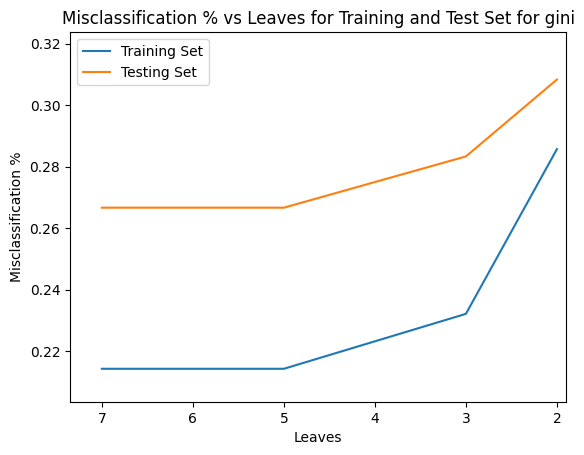

,Node,Node Type,Variable Split,n,Impurity Value,Deviance,Explained Deviance,Class/Value
0,n1,Parent,"ShelveLoc in (b'Bad', b'Medium')",280,0.48,376.06,0.073,NO
1,n2,Parent,Price>121.0,53,0.33,54.13,0.347,YES
2,n4,Child,None,27,0.07,8.55,None,YES
3,n5,Parent,Income>36.0,26,0.47,34.65,0.403,YES
4,n10,Child,None,5,0.0,-0.00,None,NO
5,n11,Child,None,21,0.36,23.05,None,YES
6,n3,Parent,Price>92.5,227,0.42,278.84,0.439,NO
7,n6,Child,None,33,0.4,38.67,None,YES
8,n7,Child,None,194,0.36,210.15,None,NO


In [10]:
alpha, pruned_table = cart.pruning(features_test, n_features_test, y_test, table = True, merge_leaves = True)
pruned_table#.style.hide_index()


In [11]:
cart.print_alpha(alpha)


('Alpha = 0', 'value soglia = None', 'misclassification = 60', 'leaves = 7')
('Alpha = 0.0', "value soglia = ['Income', 32.5, 2]", 'misclassification = 60', 'leaves = 6')
('Alpha = 0.0', "value soglia = ['Education', 15.5, 3]", 'misclassification = 60', 'leaves = 5')
('Alpha = 2.5', "value soglia = ['Price', 121.0, 1]", 'misclassification = 65', 'leaves = 3')
('Alpha = 15.0', "value soglia = ['Price', 92.5, 1]", 'misclassification = 80', 'leaves = 2')


In [12]:
#all_node = cart.get_all_node()
#leaf = cart.get_leaf()
#      
#leaf_list =[]
#leaf_dict ={}
#for node in leaf:                           #creates a list of the node numbers and a dictionary connecting nodes with their node numbers
#    leaf_list.append(int(node.name[1:]))
#    leaf_dict[node] = int(node.name[1:])
#father_list =[]
#father_dict = {}
#for node in all_node:
#    father_list.append(int(node.name[1:]))
#    father_dict[node] = int(node.name[1:])
#
#parent_child =[]                            #list for having child with their parent, for use in dictionary below
#for node in all_node:
#    if (int(node.name[1:]) *2) in father_list:
#    
#        parent_child.append([int(node.name[1:]), int(node.name[1:])*2])
#    if (int(node.name[1:])*2+1) in father_list:
#    
#        parent_child.append([int(node.name[1:]), int(node.name[1:])*2+1])  
#parent_children = {}                        #dictionary for parents with children, only numbers
#for parent, child in parent_child: 
#    if parent in parent_children:
#        parent_children[parent].append(child)
#    else:
#        parent_children[parent] = [child]
#
##igraph Graph
#        
#nr_vertices = max(father_list)                            # make too many to allow for missing nodes
#v_label = list(map(str, father_list) )                      # create node labels 
#G = Graph.Tree(nr_vertices, 2)                              # 2 stands for children number
#lay = G.layout_reingold_tilford(root=[0])
#position = {k: lay[k-1] for k in father_list}               # assigning nodes to positions , using reigngold layou
#

In [13]:
#node_prop_dict = {}
#for i in range(len(father_list)):
#    if get_key(father_dict, father_list[i]).node_prop:
#        node_prop_dict[father_list[i]] = get_key(father_dict, father_list[i]).node_prop

In [14]:
#node_prop_gain = {}
#node_prop_gain[1] = node_prop_dict[1]
#for i in range(len(node_prop_dict)):
#    if i!= 0:
#        node_prop_gain[list(node_prop_dict.keys())[i]] = node_prop_dict[list(node_prop_dict.keys())[i]] - node_prop_dict[list(node_prop_dict.keys())[i-1]]

In [15]:
#nr_vertices = max(father_list)                            # make too many to allow for missing nodes
#v_label = list(map(str, father_list) )                      # create node labels 
#G = Graph.Tree(nr_vertices, 2)                              # 2 stands for children number
#lay = G.layout_reingold_tilford(root=[0])
#position = {k: lay[k-1] for k in father_list}               # assigning nodes to positions , using reigngold layou
#
#new_dict = cart.identify_subtrees(cart.get_all_node(), cart.get_leaf())
#    
#for i in sorted(position.keys()):
#    if i*2 in position: #left nodes
#        diff = position[i*2][1] - position[i*2][1]*node_prop_gain[i] #calculates change in position for correction in downward nodes
#        position[i*2] = [position[i*2][0], position[i*2][1]*node_prop_gain[i]] #manipulates the y coordinate based on the proportion gain
#        
#        #this is to correct for all downward nodes 
#        unique_nodes = []
#        for fathers in new_dict:
#            if i*2 == int(fathers.name[1:]):
#                for nestedlist in new_dict[fathers]:
#                    for childs in nestedlist:
#                        if childs.name not in unique_nodes:
#                            unique_nodes.append(childs.name)
#                            position[int(childs.name[1:])] = [position[int(childs.name[1:])][0], position[int(childs.name[1:])][1] - diff]
#
#
#    if i*2+1 in position:  #right nodes
#        position[i*2+1] = [position[i*2+1][0], position[i*2+1][1]*node_prop_gain[i]]
#        
#        #this is to correct for all downward nodes
#        unique_nodes = []
#        for fathers in new_dict:
#            if i*2+1 == int(fathers.name[1:]):
#                for nestedlist in new_dict[fathers]:
#                    for childs in nestedlist:
#                        if childs.name not in unique_nodes:
#                            unique_nodes.append(childs.name)
#                            position[int(childs.name[1:])] = [position[int(childs.name[1:])][0], position[int(childs.name[1:])][1] - diff]
#
#position[1] = [0 , 2*position[2][1]]
#

In [16]:
#Y = [lay[k][1] for k in range(len(father_list))] # levels of the tree
#M = max(Y)
#es = EdgeSeq(G)                                             # sequence of edges
#E = [e.tuple for e in G.es] # list of edges, connects nodes
##L = len(position)
#Xn = [position[k][0] for k in father_list]
#Yn = [position[k][1] for k in father_list]
#a = 0
#while a<20:                                                 # When the value is removed it skips to the next index value, jumping, a<10 is just overkill, increased to 20, for really narrow branches
#    for edge in E:   #this is meant to catch the mismateched E's 
#        if edge[0] +1 not in position or edge[1]+1 not in position:
#            E.remove(edge) 
#    a+=1
#Xe = []
#Ye = []
#
#for edge in E: 
#    Xe+=[position[edge[0]+1][0],position[edge[1]+1][0], None]                   # edited for +1 poisiotn as the expected 0 root node it 1 in our dictionary, if index error, increase a 
#    Ye+=[position[edge[0]+1][1],position[edge[1]+1][1], None]         
#

In [17]:
#upward facing tree
#pos = Ye[1]*2
#Ye[0] = pos
#Ye[3] = pos
#Yn[24]  =pos

In [18]:
#for label in range(len(v_label)):
#    for node in all_node:
#        if v_label[label] == node.name[1:]:
#            if int(v_label[label]) in leaf_list:
#                if cart.problem == "classifier":        #For classifier problem
#                    response_dict ={}
#                    for response in cart.y[node.indexes]:        #determing majority in terminal nodes
#                        
#                        if response in response_dict:
#                            response_dict[response] +=1
#                        else:
#                            response_dict[response] =1
#                    
#                    if cart.method == "LATENT-BUDGET-TREE" or cart.twoing: #multiclass methods
#                        total_node_obs = sum(response_dict.values())
#                        for key in response_dict:
#                            response_dict[key] = round(response_dict[key] / total_node_obs,2)
#                        class_node = response_dict
#                        myKeys = list(class_node.keys())
#                        myKeys.sort()
#                        class_node = {i: class_node[i] for i in myKeys}
#                    else:
#                        class_node = max(response_dict, key = response_dict.get)
#                    
#                    if cart.impurity_fn == "gini":
#                        v_label[label] = f"{node.name}, Class: {class_node}, {cart.impurity_fn} : {round(cart.impur(node, display = True),2)}, Samples : {len(node.indexes)}" 
#                    elif cart.impurity_fn == "tau":
#                        v_label[label] = f"{node.name}, Class: {class_node}, {cart.impurity_fn} : None, Samples : {len(node.indexes)}" 
#                    else:
#                        v_label[label] = f"{node.name}, Class: {class_node}, {cart.impurity_fn} : {round(cart.impur(node),2)}, Samples : {len(node.indexes)}"
#                else:
#                    mean_y = mean(cart.y[node.indexes])
#                    v_label[label]=  f"{node.name}, {node.split}, Bin Value: {round(mean_y,2)}, {cart.impurity_fn} : {round(cart.impur(node),2)}, Samples : {len(node.indexes)}"
#            
#            #label for non leaves
#            else:
#                if cart.problem == "classifier":
#                    response_dict ={}
#                    for response in cart.y[node.indexes]:        #determing majority in terminal nodes
#                        if response in response_dict:
#                            response_dict[response] +=1
#                        else:
#                            response_dict[response] =1
#                    
#                    if cart.method == "LATENT-BUDGET-TREE" or cart.twoing: #multiclass methods
#                        total_node_obs = sum(response_dict.values())
#                        for key in response_dict:
#                            response_dict[key] = round(response_dict[key] / total_node_obs,2)
#                        class_node = response_dict
#                        myKeys = list(class_node.keys())
#                        myKeys.sort()
#                        class_node = {i: class_node[i] for i in myKeys}
#                    else:
#                        class_node = max(response_dict, key = response_dict.get)
#                    if cart.impurity_fn == "gini":
#                        v_label[label] = f"{node.name}, {node.split}, Class:{class_node}, {cart.impurity_fn} : {round(cart.impur(node, display = True),2)}, Samples: {len(node.indexes)}"
#                    elif cart.impurity_fn == "tau":
#                        v_label[label] = f"{node.name}, {node.split}, Class:{class_node}, {cart.impurity_fn} : {round(node.value_soglia_split[0][2],2)}, Samples: {len(node.indexes)}" 
#                    else:
#                        v_label[label] = f"{node.name}, {node.split}, Class:{class_node}, {cart.impurity_fn} : {round(cart.impur(node),2)}, Samples: {len(node.indexes)}"
#                else:
#                    mean_y = mean(cart.y[node.indexes])
#                    v_label[label]=  f"{node.name}, {node.split}, Bin Value: {round(mean_y,2)}, {cart.impurity_fn} : {round(cart.impur(node),2)}, Samples : {len(node.indexes)}"
#labels = v_label
## Drawing using plotly library
#fig = go.Figure()
#fig.add_trace(go.Scatter(x=Xe,
#                y=Ye,
#                mode='lines',
#                line=dict(color='rgb(210,210,210)', width=1),
#                hoverinfo='none'
#                ))
#fig.add_trace(go.Scatter(x=Xn,
#                y=Yn,
#                mode='markers',
#                name='Nodes',
#                marker=dict(symbol='circle-dot',
#                                size=18,
#                                color='#6175c1',    #'#DB4551',
#                                line=dict(color='rgb(50,50,50)', width=1)
#                                ),
#                text=labels,
#                hoverinfo='text',
#                opacity=0.8
#                ))
#filename="CART_tree.png"
#fig.update_layout(
#    title=filename[:-4],    #chops off ".png"
#    )
#fig.show()
#

full dataset model 

In [19]:
df=pd.read_csv('Carseats.csv')
#df=df.iloc[:,1:]

df.head()

features = df[list(features_names)]
features.head()

n_features = df[list(n_features_names)]
n_features.head()

y = df["Price"]
y.head()

indici = np.arange(0, len(y))


In [20]:
my_tree = MyNodeClass('n1', indici) 

cart = CART(y,features,features_names,n_features,n_features_names, impurity_fn = "between_variance", problem="regression", method = "CART",  min_cases_parent= 10,min_cases_child= 5, max_level = 4)

#cart.growing_tree(my_tree)


need to somehow get only 29 leaves in final tree?
can't prune the traditional way as only have training set 

In [21]:
#cart.print_tree(table = True, html = True).style.hide_index() #print both the pruned and non pruned tree 

